# FIFA World Cup Qatar 2022 Prediction

# Importing the required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Importing the dataset

In [2]:
#Reading the dataset
df=pd.read_csv("results.csv")
df.head(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False


In [3]:
df.shape

(43421, 9)

## Preprocessing the dataset

In [4]:
df.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

([<matplotlib.axis.XTick at 0x1ad98d35c90>,
 [Text(1, 0, 'Home Score'), Text(2, 0, 'Away Score')])

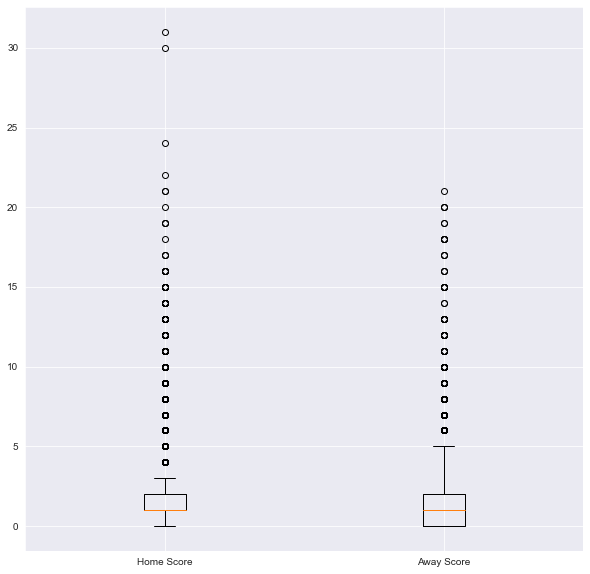

In [5]:
#finding outliers in the numerical data columns
fig = plt.figure(figsize =(10, 10))
plt.boxplot([df["home_score"],df["away_score"]])
plt.xticks([1,2], ["Home Score", "Away Score"])

In [6]:
# Removing the outliers
highestHome = 10
highestAway = 10
df = df[(df["home_score"]<highestHome) & (df["away_score"]<highestAway)]
df.shape

(43171, 9)

In [7]:
# Determining if the Home Team won, lost or drew
results = ['Win', 'Lose', "Draw"]
conditions = [df["home_score"] > df['away_score'], df["home_score"] < df['away_score'], df["home_score"] == df['away_score']]
df['result'] = np.select(conditions, results)
df.head(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,Win
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Win
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Win
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False,Win
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False,Lose
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False,Lose
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False,Win
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False,Win


In [8]:
countries = df.country.unique()
print(f"Total No. of countries: {len(countries)}")
print("Countries: ", *countries)

Total No. of countries: 267
Countries:  Scotland England Wales Ireland United States Uruguay Austria Hungary Argentina Belgium France Netherlands Bohemia Switzerland Germany Italy Chile Norway Sweden Finland Luxembourg Russia Denmark Spain Brazil Paraguay China PR Canada Estonia Guatemala Czechoslovakia Poland Yugoslavia New Zealand Romania Latvia Portugal Northern Ireland Japan Australia Lithuania Turkey Mexico Aruba Soviet Union Haiti Philippines Bulgaria Jamaica Kenya Czech Republic Peru Honduras British Guyana Uganda El Salvador Barbados Irish Free State Trinidad and Tobago Greece Curaçao Egypt Dominica Guadeloupe Palestine Netherlands Guyana French Guiana Cuba Colombia Saint Kitts and Nevis Éire Panama Bohemia and Moravia Slovakia Manchuria Croatia Costa Rica Afghanistan Martinique Southern Rhodesia Iceland Albania Madagascar Northern Rhodesia Tanganyika Iran Ecuador French Somaliland Belgian Congo Mauritius Hong Kong Vietnam Macau Republic of Ireland Ethiopia Suriname Puerto Rico

In [9]:
worldCupTeams = ["Qatar", "Germany", "Denmark", "Brazil", "France", "Belgium", "Croatia", "Spain", "Serbia", "England", "Switzerland", "Netherlands", "Argentina", "Iran", "South Korea", "Japan", "Saudi Arabia", "Ecuador", "Uruguay", "Canada", "Ghana", "Senegal", "Portugal", "Poland", "Tunisia", "Morocco", "Cameroon", "United States", "Mexico", "Wales", "Australia", "Costa Rica"]
print(len(worldCupTeams))

32


In [10]:
wc_home = df[df['home_team'].isin(worldCupTeams)]
wc_away = df[df['away_team'].isin(worldCupTeams)]
wcdf = pd.concat((wc_home, wc_away))
wcdf.shape

(22460, 10)

In [11]:
wcdf.head(20)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,Win
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Draw
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False,Lose
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False,Lose
10,1879-01-18,England,Wales,2,1,Friendly,London,England,False,Win
11,1879-04-05,England,Scotland,5,4,Friendly,London,England,False,Win
12,1879-04-07,Wales,Scotland,0,3,Friendly,Wrexham,Wales,False,Lose
14,1880-03-15,Wales,England,2,3,Friendly,Wrexham,Wales,False,Lose
16,1881-02-26,England,Wales,0,1,Friendly,Blackburn,England,False,Lose
17,1881-03-12,England,Scotland,1,6,Friendly,London,England,False,Lose


In [12]:
# Selecting matches played in the world cup after 1930
year = []
for i in wcdf['date']:
    year.append(int(i[:4]))
wcdf['year'] = year
wcdf = wcdf[wcdf["year"] > 1929]
wcdf.shape

(21276, 11)

In [13]:
wcdf.head(20)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result,year
1266,1930-01-01,Spain,Czechoslovakia,1,0,Friendly,Barcelona,Spain,False,Win,1930
1267,1930-01-12,Portugal,Czechoslovakia,1,0,Friendly,Lisbon,Portugal,False,Win,1930
1273,1930-02-23,Portugal,France,2,0,Friendly,Porto,Portugal,False,Win,1930
1274,1930-03-02,Germany,Italy,0,2,Friendly,Frankfurt am Main,Germany,False,Lose,1930
1276,1930-03-23,France,Switzerland,3,3,Friendly,Colombes,France,False,Draw,1930
1277,1930-04-05,England,Scotland,5,2,British Championship,London,England,False,Win,1930
1278,1930-04-06,Netherlands,Italy,1,1,Friendly,Amsterdam,Netherlands,False,Draw,1930
1279,1930-04-13,France,Belgium,1,6,Friendly,Colombes,France,False,Lose,1930
1280,1930-04-13,Switzerland,Hungary,2,2,Friendly,Basel,Switzerland,False,Draw,1930
1285,1930-05-04,Netherlands,Belgium,2,2,Friendly,Amsterdam,Netherlands,False,Draw,1930


In [14]:
wcdf = wcdf.drop(columns=['date', 'tournament', 'city', 'neutral', 'result'], axis=1)
wcdf.head(10)

,home_team,away_team,home_score,away_score,country,year
1266,Spain,Czechoslovakia,1,0,Spain,1930
1267,Portugal,Czechoslovakia,1,0,Portugal,1930
1273,Portugal,France,2,0,Portugal,1930
1274,Germany,Italy,0,2,Germany,1930
1276,France,Switzerland,3,3,France,1930
1277,England,Scotland,5,2,England,1930
1278,Netherlands,Italy,1,1,Netherlands,1930
1279,France,Belgium,1,6,France,1930
1280,Switzerland,Hungary,2,2,Switzerland,1930
1285,Netherlands,Belgium,2,2,Netherlands,1930


In [15]:
wcdf = wcdf.loc[:, ["year", 'home_team', 'away_team', 'country', 'home_score', 'away_score']]
wcdf.head(10)

,year,home_team,away_team,country,home_score,away_score
1266,1930,Spain,Czechoslovakia,Spain,1,0
1267,1930,Portugal,Czechoslovakia,Portugal,1,0
1273,1930,Portugal,France,Portugal,2,0
1274,1930,Germany,Italy,Germany,0,2
1276,1930,France,Switzerland,France,3,3
1277,1930,England,Scotland,England,5,2
1278,1930,Netherlands,Italy,Netherlands,1,1
1279,1930,France,Belgium,France,1,6
1280,1930,Switzerland,Hungary,Switzerland,2,2
1285,1930,Netherlands,Belgium,Netherlands,2,2


In [16]:
X = wcdf.iloc[:, :-2].values
Y = wcdf.iloc[:, -2:].values
X

array([[1930, 'Spain', 'Czechoslovakia', 'Spain'],
       [1930, 'Portugal', 'Czechoslovakia', 'Portugal'],
       [1930, 'Portugal', 'France', 'Portugal'],
       ...,
       [2022, 'Netherlands', 'Germany', 'Netherlands'],
       [2022, 'Costa Rica', 'United States', 'Costa Rica'],
       [2022, 'Panama', 'Canada', 'Panama']], dtype=object)

In [17]:
Y

array([[1, 0],
       [1, 0],
       [2, 0],
       ...,
       [1, 1],
       [2, 0],
       [1, 0]], dtype=int64)

In [18]:
le = LabelEncoder()
for i in range(1, 4):
    X[:, i] = le.fit_transform(X[:, i])
X

array([[1930, 178, 49, 180],
       [1930, 153, 49, 152],
       [1930, 153, 66, 152],
       ...,
       [2022, 134, 72, 133],
       [2022, 45, 198, 41],
       [2022, 148, 32, 147]], dtype=object)

<AxesSubplot:>

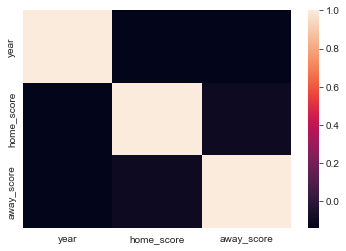

In [19]:
sns.heatmap(wcdf.corr())

## Exploratory Data Analysis

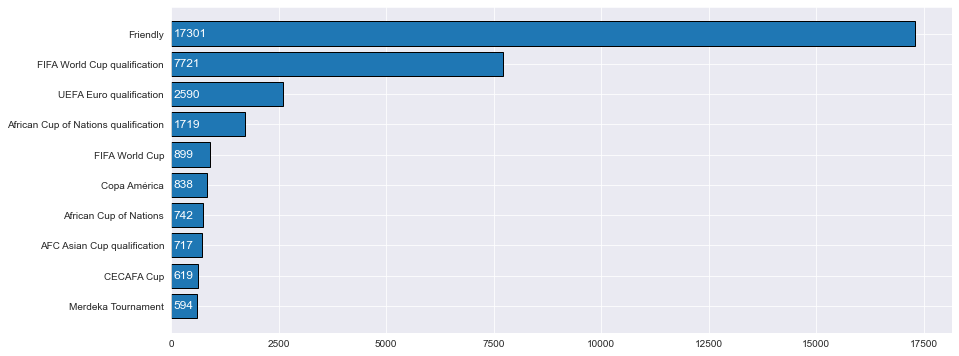

In [22]:
# Types of matches distribution
rank_bound = 10
ax = df.tournament.value_counts()[:rank_bound].sort_values()
value = ax.values
label = ax.index

plt.figure(figsize=(14,6))
plt.barh(y=label, width=value, edgecolor="k")
for i in range(rank_bound):
    plt.text(x=50,y=i-0.1,s=value[i],color="w",fontsize=12)
plt.show()

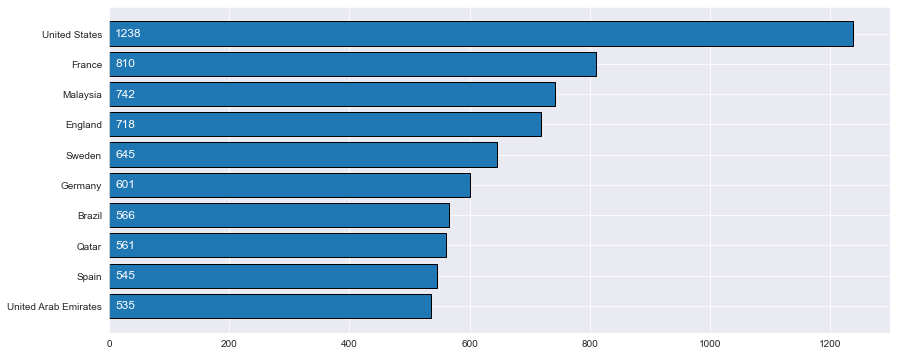

In [23]:
# Teams with most matches
rank_bound = 10
ax = df.country.value_counts()[:rank_bound].sort_values()
value = ax.values
label = ax.index

plt.figure(figsize=(14,6))
plt.barh(y=label, width=value, edgecolor="k")
for i in range(rank_bound):
    plt.text(x=10,y=i-0.1,s=value[i],color="w",fontsize=12)
plt.show()

In [26]:
# Does the home team have an advantage
data_home=df.loc[df["home_team"]==df["country"] ]
data_home=df.loc[df["tournament"] != "Friendly"]
data_home.head(5)

tournament_df=pd.crosstab(data_home["tournament"], data_home["result"],margins=True)
tournament_df=tournament_df.sort_values("All",ascending=False).head(10)
tournament_df.style.bar(color="brown",subset=["Draw","Lose","Win","All"])

result,Draw,Lose,Win,All
tournament,,,,
All,5655,7402,12813,25870
FIFA World Cup qualification,1643,2123,3955,7721
UEFA Euro qualification,510,818,1262,2590
African Cup of Nations qualification,418,353,948,1719
FIFA World Cup,199,290,410,899
Copa América,181,230,427,838
African Cup of Nations,209,200,333,742
AFC Asian Cup qualification,123,176,418,717
CECAFA Cup,147,185,287,619


Text(0.5, 1.0, 'Home Team Winning Status')

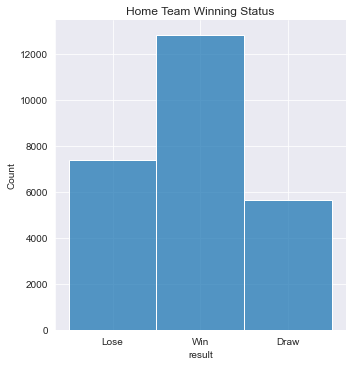

In [27]:
#Home team results
sns.displot(data_home, x="result")
plt.title("Home Team Winning Status")

In [28]:
#How each team perform while playing a tournament in home grounds

teams_win_statues=pd.crosstab(df["home_team"], df["result"],margins=True, margins_name="Total")
teams_win_statues["team_win_probability"]=teams_win_statues["Win"]/(teams_win_statues["Total"])
#Lets take teams which plays atleast 200 games
teams_win_statues_100=teams_win_statues.loc[teams_win_statues["Total"]>200]
teams_win_statues_100=teams_win_statues_100.sort_values("team_win_probability",ascending=False)
teams_win_statues_100.head(20).style.bar(color="orange",subset="team_win_probability")

#We can see teams has more than 50% wining probability while playing in the home grounds

result,Draw,Lose,Win,Total,team_win_probability
home_team,,,,,
Brazil,110,57,420,587,0.715503
Spain,69,50,252,371,0.679245
Argentina,124,68,369,561,0.657754
Ivory Coast,67,35,180,282,0.638298
Iran,62,42,182,286,0.636364
Egypt,68,74,248,390,0.635897
England,112,82,323,517,0.624758
Italy,122,51,288,461,0.624729
Germany,111,85,324,520,0.623077


In [30]:
#Teams playing in away conditions

teams_away_statues=pd.crosstab(df["away_team"], df["result"],margins=True, margins_name="Total")
teams_away_statues["team_win_probability"]=teams_away_statues["Lose"]/(teams_away_statues["Total"])
#Lets take teams which plays atleast 200 games
teams_away_statues_100=teams_away_statues.loc[teams_away_statues["Total"]>200]
teams_away_statues_100=teams_away_statues_100.sort_values("team_win_probability",ascending=False)
teams_away_statues_100.rename(columns={'Lost': 'Win'}, index={'Win': 'Lost'}, inplace=True)
teams_away_statues_100.head(20)

#The probability to wining a tournament in away conditions is very low comapred to the winning probalities in home conditions

result,Draw,Lose,Win,Total,team_win_probability
away_team,,,,,
Germany,90,244,119,453,0.538631
Brazil,95,226,102,423,0.534279
England,135,265,115,515,0.514563
Spain,99,166,83,348,0.477011
Iran,67,101,57,225,0.448889
South Korea,114,181,109,404,0.448020
Netherlands,83,164,129,376,0.436170
Russia,116,176,113,405,0.434568
Japan,56,115,103,274,0.419708


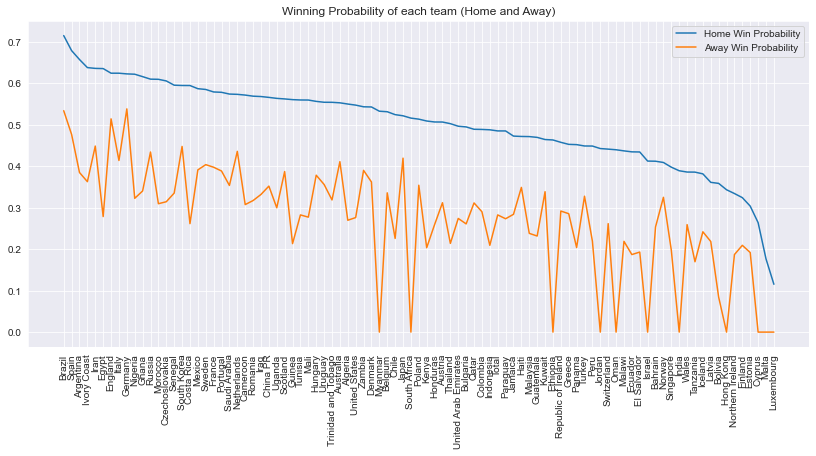

In [31]:
#Making a plot to identify wining possibilities in both home and away conditions

win_prob={teams_win_statues_100.iloc[i,:].name:[teams_win_statues_100.iloc[i,4]] for i in range(teams_win_statues_100.shape[0])}
for i in range(teams_away_statues_100.shape[0]):
    try:
        win_prob[teams_away_statues_100.iloc[i,:].name].append(teams_away_statues_100.iloc[i,4])
    except:
        pass
country_names=win_prob.keys()
lst_home=[i[0] for i in win_prob.values()]

lst_away=[]
for i in win_prob.values():
    if len(i)==2:
        lst_away.append(i[1])
    else:
        lst_away.append(0)

plt.figure(figsize=(14,6))
plt.plot(country_names,lst_home, label = "Home Win Probability")
plt.plot(country_names, lst_away, label = "Away Win Probability")
plt.xticks(rotation = 90)
plt.title("Winning Probability of each team (Home and Away)")
plt.legend()
plt.show()

In [20]:
Y = pd.DataFrame(Y)
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21276 entries, 0 to 21275
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       21276 non-null  int64
 1   1       21276 non-null  int64
dtypes: int64(2)
memory usage: 332.6 KB


In [21]:
X = pd.DataFrame(X)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21276 entries, 0 to 21275
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       21276 non-null  object
 1   1       21276 non-null  object
 2   2       21276 non-null  object
 3   3       21276 non-null  object
dtypes: object(4)
memory usage: 665.0+ KB


### Random Forest Classifier

In [66]:
rfmodel = MultiOutputRegressor(RandomForestClassifier(n_estimators=500))
rfmodel.fit(X,Y)

MultiOutputRegressor(estimator=RandomForestClassifier(n_estimators=500))

In [67]:
rfpred = rfmodel.predict(X)
rfpred

array([[1, 0],
       [1, 0],
       [2, 0],
       ...,
       [1, 1],
       [2, 0],
       [1, 0]], dtype=int64)

In [68]:
score_team_1=[i[0] for i in rfpred]
score_team_2=[i[1] for i in rfpred]

rfreport = classification_report(Y.iloc[:,0],score_team_1)
print(rfreport)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      5162
           1       0.97      0.97      0.97      6497
           2       0.97      0.96      0.97      4775
           3       0.97      0.96      0.96      2422
           4       0.97      0.97      0.97      1235
           5       0.97      0.97      0.97       583
           6       0.95      0.95      0.95       309
           7       0.95      0.97      0.96       156
           8       0.97      0.93      0.95        92
           9       0.94      1.00      0.97        45

    accuracy                           0.97     21276
   macro avg       0.96      0.97      0.96     21276
weighted avg       0.97      0.97      0.97     21276



In [69]:
rfreport2 = classification_report(Y.iloc[:,1],score_team_2)
print(rfreport2)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      7883
           1       0.97      0.97      0.97      6937
           2       0.97      0.96      0.96      3751
           3       0.98      0.95      0.96      1608
           4       0.94      0.94      0.94       653
           5       0.99      0.94      0.96       242
           6       0.95      0.97      0.96       118
           7       0.91      0.96      0.93        51
           8       0.92      0.89      0.91        27
           9       1.00      1.00      1.00         6

    accuracy                           0.97     21276
   macro avg       0.96      0.96      0.96     21276
weighted avg       0.97      0.97      0.97     21276



### Decision Tree Classifier

In [26]:
dtmodel = MultiOutputRegressor(DecisionTreeClassifier())
dtmodel.fit(X,Y)

MultiOutputRegressor(estimator=DecisionTreeClassifier())

In [27]:
dtpred = dtmodel.predict(X)
dtpred

array([[1, 0],
       [1, 0],
       [2, 0],
       ...,
       [1, 1],
       [2, 0],
       [1, 0]], dtype=int64)

In [28]:
score_team_1_dt=[i[0] for i in dtpred]
score_team_2_dt=[i[1] for i in dtpred]

dtreport = classification_report(Y.iloc[:,0],score_team_1_dt)
print(dtreport)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5162
           1       0.97      0.98      0.97      6497
           2       0.98      0.95      0.97      4775
           3       0.99      0.94      0.96      2422
           4       0.99      0.95      0.97      1235
           5       0.98      0.95      0.97       583
           6       1.00      0.92      0.95       309
           7       0.99      0.92      0.96       156
           8       1.00      0.90      0.95        92
           9       1.00      0.93      0.97        45

    accuracy                           0.97     21276
   macro avg       0.98      0.94      0.96     21276
weighted avg       0.97      0.97      0.97     21276



In [29]:
dtreport2 = classification_report(Y.iloc[:,1],score_team_2_dt)
print(dtreport2)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      7883
           1       0.97      0.97      0.97      6937
           2       0.98      0.94      0.96      3751
           3       0.99      0.93      0.96      1608
           4       0.97      0.92      0.94       653
           5       1.00      0.93      0.96       242
           6       1.00      0.95      0.97       118
           7       1.00      0.86      0.93        51
           8       1.00      0.81      0.90        27
           9       1.00      1.00      1.00         6

    accuracy                           0.97     21276
   macro avg       0.99      0.93      0.96     21276
weighted avg       0.97      0.97      0.97     21276



### KNN Classification

In [30]:
knnmodel = MultiOutputRegressor(KNeighborsClassifier())
knnmodel.fit(X,Y)

MultiOutputRegressor(estimator=KNeighborsClassifier())

In [31]:
knnpred = knnmodel.predict(X)
knnpred

array([[3, 1],
       [1, 1],
       [2, 0],
       ...,
       [1, 0],
       [1, 0],
       [0, 0]], dtype=int64)

In [32]:
score_team_1=[i[0] for i in knnpred]
score_team_2=[i[1] for i in knnpred]

knnreport = classification_report(Y.iloc[:,0],score_team_1)
print(knnreport)

              precision    recall  f1-score   support

           0       0.52      0.73      0.61      5162
           1       0.56      0.66      0.61      6497
           2       0.55      0.48      0.51      4775
           3       0.52      0.31      0.39      2422
           4       0.49      0.19      0.27      1235
           5       0.43      0.11      0.17       583
           6       0.57      0.10      0.17       309
           7       0.56      0.10      0.16       156
           8       0.86      0.07      0.12        92
           9       0.50      0.09      0.15        45

    accuracy                           0.54     21276
   macro avg       0.56      0.28      0.32     21276
weighted avg       0.54      0.54      0.52     21276



In [33]:
knnreport2 = classification_report(Y.iloc[:,1],score_team_2, zero_division=False)
print(knnreport2)

              precision    recall  f1-score   support

           0       0.58      0.78      0.67      7883
           1       0.58      0.62      0.60      6937
           2       0.55      0.35      0.43      3751
           3       0.51      0.19      0.27      1608
           4       0.45      0.15      0.23       653
           5       0.53      0.12      0.19       242
           6       0.50      0.08      0.14       118
           7       0.67      0.04      0.07        51
           8       0.00      0.00      0.00        27
           9       0.00      0.00      0.00         6

    accuracy                           0.57     21276
   macro avg       0.44      0.23      0.26     21276
weighted avg       0.56      0.57      0.55     21276



### XGBoost

In [48]:
from xgboost import XGBRegressor
model = XGBRegressor(
    n_estimators=8000,
    booster='gbtree',
    eval_metric=['auc', "rmse"],
    n_jobs=-1,
)
model

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=['auc', 'rmse'], gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=8000, n_jobs=-1,
             num_parallel_tree=None, predictor=None, random_state=None,
             reg_alpha=None, reg_lambda=None, ...)

In [24]:
X.dtypes

0    object
1    object
2    object
3    object
dtype: object

In [25]:
X = X.astype('int')
X.dtypes

0    int32
1    int32
2    int32
3    int32
dtype: object

In [252]:
xgbmodel = MultiOutputRegressor(model)
xgbmodel.fit(X,Y)

MultiOutputRegressor(estimator=XGBRegressor(base_score=None, booster='gbtree',
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=12,
   

In [49]:
xgbmodel1 = MultiOutputRegressor(model)
xgbmodel1.fit(X,Y)

MultiOutputRegressor(estimator=XGBRegressor(base_score=None, booster='gbtree',
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=['auc', 'rmse'],
                                            gamma=None, gpu_id=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_to_onehot=None,
                           

In [50]:
score = xgbmodel1.score(X, Y)
print("Training score: ", score)

Training score:  0.9698202461925745


In [51]:
xgbrpred1 = xgbmodel1.predict(X)
xgbrpred1

array([[ 1.0043347e+00, -3.4071715e-03],
       [ 9.9954343e-01,  2.6421743e-03],
       [ 1.9989609e+00, -5.7748094e-04],
       ...,
       [ 1.0006217e+00,  1.0024866e+00],
       [ 1.9996599e+00,  9.3618280e-04],
       [ 1.0004966e+00,  9.7665354e-04]], dtype=float32)

In [52]:
xgbrpred1 = np.round(xgbrpred1)
xgbrpred1 = np.int_(xgbrpred1)
xgbrpred1

array([[1, 0],
       [1, 0],
       [2, 0],
       ...,
       [1, 1],
       [2, 0],
       [1, 0]])

In [53]:
from sklearn.metrics import accuracy_score

Ypred = pd.DataFrame(Y)
Xpred = pd.DataFrame(xgbrpred1)

accuracy = accuracy_score(Ypred.iloc[:, 0], Xpred.iloc[:, 0] )
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 95.52%


In [253]:
xgbrpred = xgbmodel.predict(X)
xgbrpred

array([[ 1.0008392e+00, -6.0913015e-05],
       [ 1.0031062e+00, -1.5373398e-03],
       [ 1.9991062e+00, -1.0003102e-03],
       ...,
       [ 1.0013429e+00,  1.0039610e+00],
       [ 1.9999537e+00, -3.1889143e-04],
       [ 1.0001768e+00,  3.4289755e-04]], dtype=float32)

In [254]:
xgbrpred = np.round(xgbrpred)
xgbrpred = np.int_(xgbrpred)
xgbrpred

array([[1, 0],
       [1, 0],
       [2, 0],
       ...,
       [1, 1],
       [2, 0],
       [1, 0]])

In [255]:
score = xgbmodel.score(X, Y)
print("Training score: ", score)

Training score:  0.9693606948205399


In [256]:
from sklearn.metrics import accuracy_score

Ypred = pd.DataFrame(Y)
Xpred = pd.DataFrame(xgbrpred)

accuracy = accuracy_score(Ypred.iloc[:, 0], Xpred.iloc[:, 0] )
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 95.51%


In [64]:
score_team_1=[i[0] for i in xgbrpred]
score_team_2=[i[1] for i in xgbrpred]

xgbreport = classification_report(Y.iloc[:,0],score_team_1, zero_division=False)
print(xgbreport)

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      5162
           1       0.94      0.97      0.96      6497
           2       0.94      0.95      0.95      4775
           3       0.95      0.94      0.95      2422
           4       0.94      0.95      0.94      1235
           5       0.94      0.95      0.94       583
           6       0.95      0.91      0.93       309
           7       0.97      0.92      0.94       156
           8       1.00      0.90      0.95        92
           9       1.00      0.93      0.97        45

    accuracy                           0.96     21276
   macro avg       0.96      0.94      0.95     21276
weighted avg       0.96      0.96      0.96     21276



## Gradient Boosting Regressor

In [78]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators=4000, verbose=1, max_depth=8)
model

GradientBoostingRegressor(max_depth=8, n_estimators=4000, verbose=1)

In [79]:
gbrmodel = MultiOutputRegressor(model)
gbrmodel.fit(X, Y)

      Iter       Train Loss   Remaining Time 
         1           2.3659            2.47m
         2           2.3007            2.43m
         3           2.2469            2.73m
         4           2.2043            2.86m
         5           2.1559            3.10m
         6           2.1155            3.11m
         7           2.0705            3.06m
         8           2.0407            2.98m
         9           2.0090            2.91m
        10           1.9894            2.86m
        20           1.7912            2.70m
        30           1.6601            3.06m
        40           1.5267            3.09m
        50           1.4284            3.05m
        60           1.3616            3.05m
        70           1.3039            3.09m
        80           1.2547            3.12m
        90           1.2052            3.07m
       100           1.1645            3.01m
       200           0.8466            2.68m
       300           0.6510            2.50m
       40

MultiOutputRegressor(estimator=GradientBoostingRegressor(max_depth=8,
                                                         n_estimators=4000,
                                                         verbose=1))

In [80]:
score = gbrmodel.score(X, Y)
print("Training score: ", score)

Training score:  0.9696842508062817


In [81]:
gbrpred= gbrmodel.predict(X)
gbrpred

array([[ 1.00884469e+00,  9.65946018e-04],
       [ 9.99572877e-01, -8.69444376e-03],
       [ 1.99511670e+00,  4.83747373e-03],
       ...,
       [ 1.00725073e+00,  1.00295967e+00],
       [ 2.00025434e+00,  3.18769132e-04],
       [ 9.99679712e-01, -1.03441836e-03]])

In [82]:
gbrpred = np.round(gbrpred)
gbrpred = np.int_(gbrpred)
gbrpred

array([[1, 0],
       [1, 0],
       [2, 0],
       ...,
       [1, 1],
       [2, 0],
       [1, 0]])

In [83]:
from sklearn.metrics import accuracy_score

Ypred = pd.DataFrame(Y)
Xpred = pd.DataFrame(gbrpred)

accuracy = accuracy_score(Ypred.iloc[:, 0], Xpred.iloc[:, 0] )
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 95.52%


In [84]:
score_team_1=[i[0] for i in gbrpred]
score_team_2=[i[1] for i in gbrpred]

gbrreport = classification_report(Y.iloc[:,0],score_team_1, zero_division=False)
print(gbrreport)

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      5162
           1       0.94      0.97      0.96      6497
           2       0.94      0.95      0.95      4775
           3       0.96      0.94      0.95      2422
           4       0.94      0.95      0.94      1235
           5       0.95      0.95      0.95       583
           6       0.95      0.91      0.93       309
           7       0.97      0.92      0.94       156
           8       1.00      0.90      0.95        92
           9       1.00      0.93      0.97        45

    accuracy                           0.96     21276
   macro avg       0.96      0.94      0.95     21276
weighted avg       0.96      0.96      0.96     21276



# World Cup 2022 Predictions

In [144]:
Group_A= ["Qatar","Ecuador","Senegal","Netherlands"]
Group_B= ["England","Iran","United States","Wales"]
Group_C= ["Argentina","Saudi Arabia","Mexico","Poland"]
Group_D= ["France","Australia","Denmark","Tunisia"]
Group_E= ["Spain","Costa Rica","Germany","Japan"]
Group_F= ["Belgium","Canada","Morocco","Croatia"]
Group_G= ["Brazil","Serbia","Switzerland","Cameroon"]
Group_H= ["Portugal","Ghana","Uruguay","South Korea"]
Groups={
    "Group A":Group_A,
    "Group B":Group_B,
    "Group C":Group_C,
    "Group D":Group_D,
    "Group E":Group_E,
    "Group F":Group_F,
    "Group G":Group_G,
    "Group H":Group_H
}

In [172]:
#Initialize basic parameters

year=2022
stadium="Qatar"
stadium_num=le.transform([stadium])[0]
host_num=stadium_num

In [146]:
def select_winning_team(probability_array):
    prob_lst=[round(probability_array[0][i],3) for i in range(2)]
    if (prob_lst[0]>prob_lst[1]):
        out=0
    elif (prob_lst[0]<prob_lst[1]):
        out=1
    elif (prob_lst[0]==prob_lst[1]):
        out=2
    return out,prob_lst

In [173]:
##Group stage Matches

Group_standings={}
for grp_name in list(Groups.keys()):
    print(f"{grp_name} Matches")
    probable_countries=Groups[grp_name]
    team_wins_dct={}
    goal_scored_dct={}
    goal_against_dct={}
    win_dct={}
    draw_dct={}
    lost_dct={}
    for i in range(len(probable_countries)):
        j=i+1
        team_1=probable_countries[i]
        team_1_num=le.transform([team_1])[0]
        team_wins=0
        while j<len((probable_countries)):
            team_2=probable_countries[j]
            team_2_num=le.transform([team_2])[0]
            team_lst=[team_1,team_2]
            Input_vector=np.array([[year,stadium_num,team_1_num,team_2_num]])
            res=rfmodel.predict(Input_vector)
            res = np.absolute(res)
            res = np.round(res)
            res = np.int_(res)
            win,prob_lst=select_winning_team(res)
            goal_scored_dct[team_1] = goal_scored_dct.get(team_1,0)+prob_lst[0]
            goal_scored_dct[team_2] = goal_scored_dct.get(team_2,0)+prob_lst[1]

            goal_against_dct[team_1] = goal_against_dct.get(team_1,0)+prob_lst[1]
            goal_against_dct[team_2] = goal_against_dct.get(team_2,0)+prob_lst[0]

            try:
                print(f" {team_1} vs {team_2} \n  Results of the Match {res[0]}\n   {team_lst[win]} wins 🎊🏆⚽🎖️\n")
                if (win)==0:
                    team_wins_dct[team_1] = team_wins_dct.get(team_1,0)+2
                    team_wins_dct[team_2] = team_wins_dct.get(team_2,0)

                    win_dct[team_1] = win_dct.get(team_1,0)+1
                    win_dct[team_2] = win_dct.get(team_2,0)
                    lost_dct[team_2] = lost_dct.get(team_2,0)+1
                    lost_dct[team_1] = lost_dct.get(team_1,0)
                    draw_dct[team_2] = draw_dct.get(team_2,0)
                    draw_dct[team_1] = draw_dct.get(team_1,0)

                elif (win)==1:
                    team_wins_dct[team_2] = team_wins_dct.get(team_2,0)+2
                    team_wins_dct[team_1] = team_wins_dct.get(team_1,0)

                    win_dct[team_2] = win_dct.get(team_2,0)+1
                    win_dct[team_1] = win_dct.get(team_1,0)
                    lost_dct[team_1] = lost_dct.get(team_1,0)+1
                    lost_dct[team_2] = lost_dct.get(team_2,0)
                    draw_dct[team_1] = draw_dct.get(team_1,0)
                    draw_dct[team_2] = draw_dct.get(team_2,0)

            except IndexError:
                print(f"{team_1} vs {team_2} \n  Results of the Match {res[0]}\n   Match Draw ⚽⚽⚽\n")
                team_wins_dct[team_1] = team_wins_dct.get(team_1,0)+1
                team_wins_dct[team_2] = team_wins_dct.get(team_2,0)+1

                draw_dct[team_1] = draw_dct.get(team_1,0)+1
                draw_dct[team_2] = draw_dct.get(team_2,0)+1

                win_dct[team_1] = win_dct.get(team_1,0)
                lost_dct[team_1] = lost_dct.get(team_1,0)

                win_dct[team_2] = win_dct.get(team_2,0)
                lost_dct[team_2] = lost_dct.get(team_2,0)

            j=j+1
    group_results=[win_dct,draw_dct,lost_dct,team_wins_dct,goal_scored_dct,goal_against_dct]
    Group_standings[grp_name]=group_results

Group A Matches
 Qatar vs Ecuador 
  Results of the Match [1 0]
   Qatar wins 🎊🏆⚽🎖️

Qatar vs Senegal 
  Results of the Match [1 1]
   Match Draw ⚽⚽⚽

Qatar vs Netherlands 
  Results of the Match [1 1]
   Match Draw ⚽⚽⚽

 Ecuador vs Senegal 
  Results of the Match [1 0]
   Ecuador wins 🎊🏆⚽🎖️

Ecuador vs Netherlands 
  Results of the Match [1 1]
   Match Draw ⚽⚽⚽

 Senegal vs Netherlands 
  Results of the Match [1 0]
   Senegal wins 🎊🏆⚽🎖️

Group B Matches
England vs Iran 
  Results of the Match [2 2]
   Match Draw ⚽⚽⚽

 England vs United States 
  Results of the Match [3 2]
   England wins 🎊🏆⚽🎖️

 England vs Wales 
  Results of the Match [3 2]
   England wins 🎊🏆⚽🎖️

 Iran vs United States 
  Results of the Match [3 0]
   Iran wins 🎊🏆⚽🎖️

 Iran vs Wales 
  Results of the Match [1 0]
   Iran wins 🎊🏆⚽🎖️

 United States vs Wales 
  Results of the Match [3 1]
   United States wins 🎊🏆⚽🎖️

Group C Matches
 Argentina vs Saudi Arabia 
  Results of the Match [1 0]
   Argentina wins 🎊🏆⚽🎖️

Argenti

In [174]:
#Display group stage results

for grp_name in list(Group_standings.keys()):

    team_wins_dct= dict(sorted(Group_standings[grp_name][3].items()))
    goal_scored_dct=dict(sorted(Group_standings[grp_name][4].items()))
    goal_against_dct=dict(sorted(Group_standings[grp_name][5].items()))

    win_dct=dict(sorted(Group_standings[grp_name][0].items()))
    draw_dct=dict(sorted(Group_standings[grp_name][1].items()))
    lost_dct=dict(sorted(Group_standings[grp_name][2].items()))

    lst_teams=list(team_wins_dct.keys())

    win_lst=list(win_dct.values())
    draw_lst=list(draw_dct.values())
    lost_lst=list(lost_dct.values())

    lst_win_count=list(team_wins_dct.values())
    goal_scored=list(goal_scored_dct.values())
    goal_against=list(goal_against_dct.values())
    goal_differance=[goal_scored[i]-goal_against[i] for i in range (len(goal_scored))]
    ranking_table=pd.DataFrame(list(zip(lst_teams,win_lst,draw_lst,lost_lst,goal_scored,goal_against,goal_differance,lst_win_count)),columns=["Team","Wins","Draw","Lost","Goal Scored","Goal Against","Goal Differance","Points"])
    ranking_table=ranking_table.sort_values("Points",ascending=False).reset_index(drop=True)
    ranking_table.index = ranking_table.index + 1
    print(f"\n\n{grp_name} Final Rankings")
    print(ranking_table.to_markdown())



Group A Final Rankings
|    | Team        |   Wins |   Draw |   Lost |   Goal Scored |   Goal Against |   Goal Differance |   Points |
|---:|:------------|-------:|-------:|-------:|--------------:|---------------:|------------------:|---------:|
|  1 | Qatar       |      1 |      2 |      0 |             3 |              2 |                 1 |        4 |
|  2 | Ecuador     |      1 |      1 |      1 |             2 |              2 |                 0 |        3 |
|  3 | Senegal     |      1 |      1 |      1 |             2 |              2 |                 0 |        3 |
|  4 | Netherlands |      0 |      2 |      1 |             2 |              3 |                -1 |        2 |


Group B Final Rankings
|    | Team          |   Wins |   Draw |   Lost |   Goal Scored |   Goal Against |   Goal Differance |   Points |
|---:|:--------------|-------:|-------:|-------:|--------------:|---------------:|------------------:|---------:|
|  1 | England       |      2 |      1 |      0 | 

In [227]:
stadium_num = 0

In [229]:
##Round of 16 Section_1
import random
qualified_teams_1=[]
standings=list(Group_standings.keys())
i=0
print(f"Round of 16\n")
while i < (len(standings)):
    A_team= sorted(Group_standings[standings[i]][3].items(), key=lambda x: x[1], reverse=True)
    team_1=A_team[0][0]
    B_team= sorted(Group_standings[standings[i+1]][3].items(), key=lambda x: x[1], reverse=True)
    team_2=B_team[1][0]

    team_1_num=le.transform([team_1])[0]
    team_2_num=le.transform([team_2])[0]
    team_lst=[team_1,team_2]

    Input_vector=np.array([[year,host_num,team_1_num,team_2_num]])
    res=rfmodel.predict(Input_vector)
    res = np.absolute(res)
    res = np.round(res)
    res = np.int_(res)
    win,_=select_winning_team(res)

    try:
        print(f"{team_1} vs {team_2} \n  {team_lst[win]} wins 🏆🏆")
        print(f"    {team_lst[win]} into the Quater-Finals ⏩⏩ \n")
        qualified_teams_1.append(team_lst[win])
    except IndexError:
        print(f"{team_1} vs {team_2} \n  Match Draw ⚽⚽")
        winning_team=random.choice(team_lst)
        print(f"   {winning_team} wins at Penaly Shoot-Out 🥅🎯")
        print(f"    {winning_team} into the Quater-Finals ⏩⏩ \n")
        qualified_teams_1.append(winning_team)
    i=i+2

##Round of 16 Section_2
qualified_teams_2=[]
standings=list(Group_standings.keys())
i=0
while i < (len(standings)):
    A_team= sorted(Group_standings[standings[i]][3].items(), key=lambda x: x[1], reverse=True)
    team_1=A_team[1][0]
    B_team= sorted(Group_standings[standings[i+1]][3].items(), key=lambda x: x[1], reverse=True)
    team_2=B_team[0][0]

    team_1_num=le.transform([team_1])[0]
    team_2_num=le.transform([team_2])[0]
    team_lst=[team_1,team_2]

    Input_vector=np.array([[year,host_num,team_1_num,team_2_num]])
    res=dtmodel.predict(Input_vector)
    res = np.absolute(res)
    res = np.round(res)
    res = np.int_(res)
    win,_=select_winning_team(res)

    try:
        print(f"{team_1} vs {team_2} \n  {team_lst[win]} wins 🏆🏆")
        print(f"    {team_lst[win]} into the Quater-Finals ⏩⏩ \n")
        qualified_teams_2.append(team_lst[win])

    except IndexError:
        print(f"{team_1} vs {team_2} \n  Match Draw ⚽⚽")
        winning_team=random.choice(team_lst)
        print(f"   {winning_team} wins at Penaly Shoot-Out 🥅🎯")
        print(f"    {winning_team} into the Quater-Finals ⏩⏩ \n")
        qualified_teams_2.append(winning_team)
    i=i+2

Round of 16

Qatar vs Iran 
  Match Draw ⚽⚽
   Qatar wins at Penaly Shoot-Out 🥅🎯
    Qatar into the Quater-Finals ⏩⏩ 

Argentina vs Denmark 
  Match Draw ⚽⚽
   Argentina wins at Penaly Shoot-Out 🥅🎯
    Argentina into the Quater-Finals ⏩⏩ 

Spain vs Morocco 
  Spain wins 🏆🏆
    Spain into the Quater-Finals ⏩⏩ 

Brazil vs Ghana 
  Brazil wins 🏆🏆
    Brazil into the Quater-Finals ⏩⏩ 

Ecuador vs England 
  England wins 🏆🏆
    England into the Quater-Finals ⏩⏩ 

Mexico vs Australia 
  Australia wins 🏆🏆
    Australia into the Quater-Finals ⏩⏩ 

Costa Rica vs Belgium 
  Costa Rica wins 🏆🏆
    Costa Rica into the Quater-Finals ⏩⏩ 

Serbia vs Portugal 
  Match Draw ⚽⚽
   Portugal wins at Penaly Shoot-Out 🥅🎯
    Portugal into the Quater-Finals ⏩⏩ 



In [230]:
print(f"Teams selected to the Quater Finals - {qualified_teams_1+qualified_teams_2}")

Teams selected to the Quater Finals - ['Qatar', 'Argentina', 'Spain', 'Brazil', 'England', 'Australia', 'Costa Rica', 'Portugal']


In [246]:
#Quarter Finals

Semifinal_teams=[]
i=0
print(f"Quater Final Matches\n")
while i < (len(qualified_teams_1))-1:
    team_1= qualified_teams_1[i]
    team_2= qualified_teams_1[i+1]

    team_1_num=le.transform([team_1])[0]
    team_2_num=le.transform([team_2])[0]
    team_lst=[team_1,team_2]

    Input_vector=np.array([[year,host_num,team_1_num,team_2_num]])
    res=xgbmodel.predict(Input_vector)
    res = np.absolute(res)
    res = np.round(res)
    res = np.int_(res)
    win,_=select_winning_team(res)

    try:
        print(f"{team_1} vs {team_2} \n  {team_lst[win]} wins 🏆🏆")
        print(f"    {team_lst[win]} into the Semi-Finals ⏩⏩ \n")
        Semifinal_teams.append(team_lst[win])

    except IndexError:
        print(f"{team_1} vs {team_2} \n  Match Draw ⚽⚽")
        winning_team=random.choice(team_lst)
        print(f"   {winning_team} wins at Penaly Shoot-Out 🥅🎯")
        print(f"    {winning_team} into the Semi-Finals ⏩⏩ \n")
        Semifinal_teams.append(winning_team)
    i=i+2

i=0
while i < (len(qualified_teams_2))-1:
    team_1= qualified_teams_2[i]
    team_2= qualified_teams_2[i+1]
    team_1_num=le.transform([team_1])[0]
    team_2_num=le.transform([team_2])[0]
    team_lst=[team_1,team_2]

    Input_vector=np.array([[year,host_num,team_1_num,team_2_num]])
    res=dtmodel.predict(Input_vector)
    win,_=select_winning_team(res)

    try:
        print(f"{team_1} vs {team_2} \n  {team_lst[win]} wins 🏆🏆")
        print(f"    {team_lst[win]} into the Semi-Finals ⏩⏩ \n")
        Semifinal_teams.append(team_lst[win])

    except IndexError:
        print(f"{team_1} vs {team_2} \n  Match Draw ⚽⚽")
        winning_team=random.choice(team_lst)
        print(f"   {winning_team} wins at Penaly Shoot-Out 🥅🎯")
        print(f"    {winning_team} into the Semi-Finals ⏩⏩ \n")
        Semifinal_teams.append(winning_team)
    i=i+2

Quater Final Matches

Qatar vs Argentina 
  Match Draw ⚽⚽
   Argentina wins at Penaly Shoot-Out 🥅🎯
    Argentina into the Semi-Finals ⏩⏩ 

Spain vs Brazil 
  Match Draw ⚽⚽
   Spain wins at Penaly Shoot-Out 🥅🎯
    Spain into the Semi-Finals ⏩⏩ 

England vs Australia 
  England wins 🏆🏆
    England into the Semi-Finals ⏩⏩ 

Costa Rica vs Portugal 
  Match Draw ⚽⚽
   Portugal wins at Penaly Shoot-Out 🥅🎯
    Portugal into the Semi-Finals ⏩⏩ 



In [247]:
print(f"Teams selected to the Semi-Finals - {Semifinal_teams}")

Teams selected to the Semi-Finals - ['Argentina', 'Spain', 'England', 'Portugal']


In [248]:
#Semi Finals

final_teams=[]
third_place_match_teams=[]
i=0
print(f"Semi Final Matches\n")
while i < (len(Semifinal_teams))-1:
    team_1= Semifinal_teams[i]
    team_2= Semifinal_teams[i+1]

    team_1_num=le.transform([team_1])[0]
    team_2_num=le.transform([team_2])[0]
    team_lst=[team_1,team_2]

    Input_vector=np.array([[year,host_num,team_1_num,team_2_num]])
    res=xgbmodel.predict(Input_vector)
    res = np.absolute(res)
    res = np.round(res)
    res = np.int_(res)
    win,_=select_winning_team(res)

    try:
        print(f"{team_1} vs {team_2} \n  {team_lst[win]} wins 🏆🏆")
        print(f"    {team_lst[win]} into the FIFA-Finals ⏩⏩ \n")
        final_teams.append(team_lst[win])
        third_place_match_teams.append(team_lst[(win+1)%2])


    except IndexError:
        print(f"{team_1} vs {team_2} \n  Match Draw ⚽⚽")
        winning_team=random.choice(team_lst)
        print(f"   {winning_team} wins at Penaly Shoot-Out 🥅🎯")
        print(f"    {winning_team} into the FIFA-Finals ⏩⏩ \n")
        final_teams.append(winning_team)
        team_lst.remove(winning_team)
        third_place_match_teams.append(team_lst[0])
    i=i+2

Semi Final Matches

Argentina vs Spain 
  Spain wins 🏆🏆
    Spain into the FIFA-Finals ⏩⏩ 

England vs Portugal 
  England wins 🏆🏆
    England into the FIFA-Finals ⏩⏩ 



In [249]:
print(f"Teams selected to the Finals - {final_teams}")
print(f"Teams selected to the Third Place match - {third_place_match_teams}")

Teams selected to the Finals - ['Spain', 'England']
Teams selected to the Third Place match - ['Argentina', 'Portugal']


In [250]:
#Finals and Third Place match

print(f"FiFA FINAl\n")
team_1= final_teams[1]
team_2= final_teams[0]

team_1_num=le.transform([team_1])[0]
team_2_num=le.transform([team_2])[0]
team_lst=[team_1,team_2]

Input_vector=np.array([[year,host_num,team_1_num,team_2_num]])
res=rfmodel.predict(Input_vector)
win,_=select_winning_team(res)

try:
    print(f"{team_1} vs {team_2} \n  {team_lst[win]} are the Winners 🎉🏆🎉\n\n")
    winner=team_lst[win]
    place_2=team_lst[(win+1)%2]

except IndexError:
    print(f"{team_1} vs {team_2} \n  Match Draw ⚽⚽")
    winning_team=random.choice(team_lst)
    print(f"   {winning_team} wins at Penaly Shoot-Out 🥅🎯")
    print(f"    {winning_team} are the Winners 🎉🏆🎉\n\n")
    winner=winning_team

    team_lst.remove(winning_team)
    place_2=team_lst[0]

print(f"Third Place match\n")
team_1= third_place_match_teams[1]
team_2= third_place_match_teams[0]

team_1_num=le.transform([team_1])[0]
team_2_num=le.transform([team_2])[0]
team_lst=[team_1,team_2]

Input_vector=np.array([[year,host_num,team_1_num,team_2_num]])
res=xgbmodel.predict(Input_vector)
res = np.absolute(res)
res = np.round(res)
res = np.int_(res)
win,_=select_winning_team(res)

try:
    print(f"{team_1} vs {team_2} \n  {team_lst[win]} Wins the 3rd Place 🎉🏆🎉\n")
    place_3=team_lst[win]

except IndexError:
    print(f"{team_1} vs {team_2} \n  Match Draw ⚽⚽")
    winning_team=random.choice(team_lst)
    print(f"   {winning_team} wins at Penaly Shoot-Out 🥅🎯")
    print(f"    {winning_team} Wins the 3rd Place 🎉🏆🎉\n")
    place_3=winning_team



print(f"\n\nWinner is {winner} 🥇🥇🥇")
print(f"Runner-up is {place_2} 🥈🥈🥈")
print(f"3rd Place is {place_3} 🥉🥉🥉")

FiFA FINAl

England vs Spain 
  England are the Winners 🎉🏆🎉


Third Place match

Portugal vs Argentina 
  Portugal Wins the 3rd Place 🎉🏆🎉



Winner is England 🥇🥇🥇
Runner-up is Spain 🥈🥈🥈
3rd Place is Portugal 🥉🥉🥉
